In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv("trec_eval_output_example.txt",delimiter='\t',header=None,names=["Desc","Id","Values"])

## Preprocessing

In [107]:
# remove whitespaces that came from trec_eval 
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# convert the number values that are represented as strings to be represented as floats
df.Values = df.Values.apply(lambda x: float(x) if x != "RunID" else x)

In [108]:
recall_order = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
iprec_at_recallN = ["iprec_at_recall_0.00", "iprec_at_recall_0.10","iprec_at_recall_0.20","iprec_at_recall_0.30",
                    "iprec_at_recall_0.40","iprec_at_recall_0.50","iprec_at_recall_0.60","iprec_at_recall_0.70",
                    "iprec_at_recall_0.80","iprec_at_recall_0.90","iprec_at_recall_1.00"]
P_N = ["P_5","P_10","P_15","P_20","P_30","P_100","P_200","P_500","P_1000"]

In [109]:
#create double index
df = df.set_index(['Id', 'Desc'])
#it's a convention to call sort_index() after a double index has been created
df = df.sort_index()
# this is to help navigate in a double index dataframe
idx = pd.IndexSlice

## Query example

In [110]:
#example of a query. Get the <Values> column where the index is "103" for the Id column, and "iprec_at_recall_0.00" for the <Desc> column
df.loc[idx['103',"iprec_at_recall_0.00"], 'Values']
#another example, now to get an entire column we can pass a list of strings to the index
df.loc[idx['103',iprec_at_recallN], 'Values']

Id   Desc                
103  iprec_at_recall_0.00       0.1
     iprec_at_recall_0.10       0.1
     iprec_at_recall_0.20      0.08
     iprec_at_recall_0.30    0.0248
     iprec_at_recall_0.40    0.0156
     iprec_at_recall_0.50         0
     iprec_at_recall_0.60         0
     iprec_at_recall_0.70         0
     iprec_at_recall_0.80         0
     iprec_at_recall_0.90         0
     iprec_at_recall_1.00         0
Name: Values, dtype: object

## Plot precision-recall curves

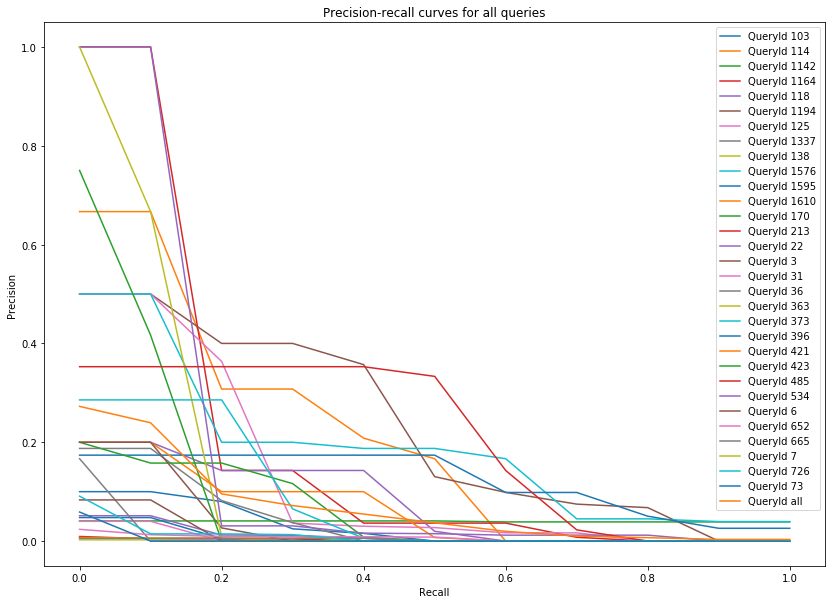

In [111]:
# get all the query Ids that exist in our dataframe
QueryIds = df.index.levels[0]
ax = plt.figure(1, figsize=(14,10))
#plot the precision-recall curve for the first n ids
for query in range(len(QueryIds)):
    x = recall_order
    y = df.loc[idx[QueryIds[query],iprec_at_recallN], 'Values'].values
    plt.plot(x,y,label="QueryId {}".format(QueryIds[query]))
plt.title("Precision-recall curves for all queries",)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

## Convert to .py file

In [103]:
#convert a python notebook script to a python script
#uncomment and run the line below
#!jupyter nbconvert --to script parsingTrec.ipynb